# Intuit Quickbooks Upgrade

* Team-lead GitLab userid: 236
* Group name: Just4Noobs
* Team member names: Tiancheng Kuang, Kaicheng Yang, Songqiao Li, Yanqiao Li

## Setup

Please complete this python notebook with your group by answering the questions in `intuit-redux.pdf`. Create a Notebook and HTML file with all your results and comments and push both the Notebook and HTML file to GitLab when your team is done. All results MUST be reproducible (i.e., the TA and I must be able to recreate the HTML file from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the rsm-msba-spark docker container.

This is the second group assignment for MGTA 455 and you will be using Git and GitLab. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's change to accept so the team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes from the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitLab. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `model1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file 
* If you are going to work simultaneously, do it in different notebooks, e.g., 
    - model1.ipynb, model2.ipynb, model3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/git-group-workflow-wbg.png)

Tutorial videos about using Git, GitLab, and GitGadget for group assignments:

* Setup the MSBA server to use Git and GitLab: https://youtu.be/zJHwodmjatY
* Dealing with Merge Conflicts: https://youtu.be/qFnyb8_rgTI
* Group assignment practice: https://youtu.be/4Ty_94gIWeA

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit

# increase plot resolution
# mpl.rcParams["figure.dpi"] = 150

In [2]:
## loading the data - this dataset must NOT be changed
intuit75k = pd.read_pickle("data/intuit75k.pkl")
intuit75k["res1_yes"] = (intuit75k["res1"] == "Yes").astype(int)
intuit75k.head()

,id,zip,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0


In [3]:
# show dataset description
rsm.describe(intuit75k)

## Intuit: Quickbooks upgrade

The purpose of this exercise is to gain experience modeling the response to an upsell campaign. The `intuit75k.rds` file contains data on 75,000 (small) businesses that were selected randomly from the 801,821 that were sent the wave-1 mailing. The mailing contained an offer to upgrade to the latest version of the Quickbooks software. 

Variable `res1` denotes which of these businesses responded to the mailing by purchasing Quickbooks version 3.0 from Intuit Direct. Note that Intuit Direct sells products directly to its customers rather than through a retailer. Use the available data to predict which businesses that did not respond to the wave-1 mailing, are most likely to respond to the wave-2 mailing. Note that variables were added, deleted, and recoded so please ignore the variable descriptions in Exhibit 3 in the case in the course reader. Instead, use the variable descriptions below:

## Variable description

* id: Small business customer ID
* zip: 5-Digit ZIP Code (00000=unknown, 99999=international ZIPs).
* zip_bins: Zip-code bins (20 approx. equal sized bins from lowest to highest zip code number)
* sex: "Female", "Male", or "Unknown"
* bizflag: Business Flag.  Address contains a Business name (1 = yes, 0 = no or unknown).
* numords: Number of orders from Intuit Direct in the previous 36 months
* dollars: Total $ ordered from Intuit Direct in the previous 36 months
* last: Time (in months) since last order from Intuit Direct in previous 36 months
* sincepurch: Time (in months) since original (not upgrade) purchase of Quickbooks
* version1: Is 1 if customer's current Quickbooks is version 1, 0 if version 2
* owntaxprod: Is 1 if customer purchased tax software, 0 otherwise
* upgraded: Is 1 if customer upgraded from Quickbooks vs. 1 to vs. 2
* res1: Response to wave 1 mailing ("Yes" if responded else "No")
* training: 70/30 split, 1 for training sample, 0 for validation sample


## Intuit: Quickbooks upgrade

The purpose of this exercise is to gain experience modeling the response to an upsell campaign. The `intuit75k.rds` file contains data on 75,000 (small) businesses that were selected randomly from the 801,821 that were sent the wave-1 mailing. The mailing contained an offer to upgrade to the latest version of the Quickbooks software. 

Variable `res1` denotes which of these businesses responded to the mailing by purchasing Quickbooks version 3.0 from Intuit Direct. Note that Intuit Direct sells products directly to its customers rather than through a retailer. Use the available data to predict which businesses that did not respond to the wave-1 mailing, are most likely to respond to the wave-2 mailing. Note that variables were added, deleted, and recoded so please ignore the variable descriptions in Exhibit 3 in the case in the course reader. Instead, use the variable descriptions below:

## Variable description

* id: Small business customer ID
* zip: 5-Digit ZIP Code (00000=unknown, 99999=international ZIPs).
* zip_bins: Zip-code bins (20 approx. equal sized bins from lowest to highest zip code number)
* sex: "Female", "Male", or "Unknown"
* bizflag: Business Flag.  Address contains a Business name (1 = yes, 0 = no or unknown).
* numords: Number of orders from Intuit Direct in the previous 36 months
* dollars: Total $ ordered from Intuit Direct in the previous 36 months
* last: Time (in months) since last order from Intuit Direct in previous 36 months
* sincepurch: Time (in months) since original (not upgrade) purchase of Quickbooks
* version1: Is 1 if customer's current Quickbooks is version 1, 0 if version 2
* owntaxprod: Is 1 if customer purchased tax software, 0 otherwise
* upgraded: Is 1 if customer upgraded from Quickbooks vs. 1 to vs. 2
* res1: Response to wave 1 mailing ("Yes" if responded else "No")
* training: 70/30 split, 1 for training sample, 0 for validation sample



Cross-tabs
Variables: res1, rec_iq
Null hyp: there is no association between res1 and rec_iq
Alt. hyp: there is an association between res1 and rec_iq

Column percentages:

rec_iq       1       2       3       4       5       6       7   Total
res1                                                                  
Yes      8.35%   6.64%   4.96%   4.02%   3.71%    2.9%   2.34%   4.76%
No      91.65%  93.36%  95.04%  95.98%  96.29%   97.1%  97.66%  95.24%
Total   100.0%  100.0%  100.0%  100.0%  100.0%  100.0%  100.0%  100.0%

Chi-squared: 460.63 df(6), p.value < .001
0.0% of cells have expected values below 5

None
None

Cross-tabs
Variables: res1, freq_iq
Null hyp: there is no association between res1 and freq_iq
Alt. hyp: there is an association between res1 and freq_iq

Column percentages:

freq_iq       1       2       3       4       7   Total
res1                                                   
Yes      10.68%   8.11%   4.86%   4.36%   3.42%   4.76%
No       89.32%  91.89%  95.1

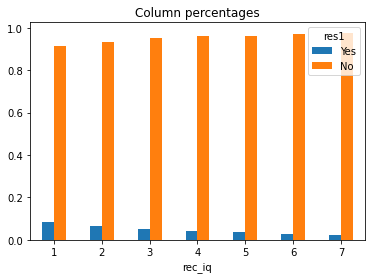

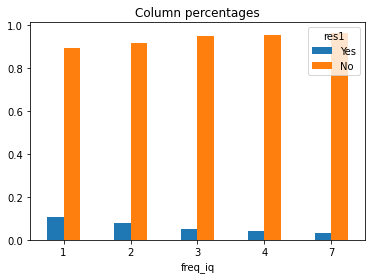

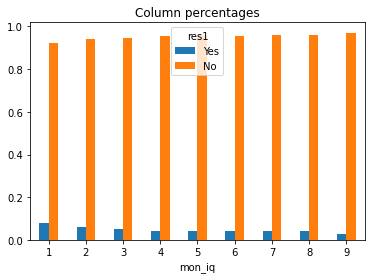

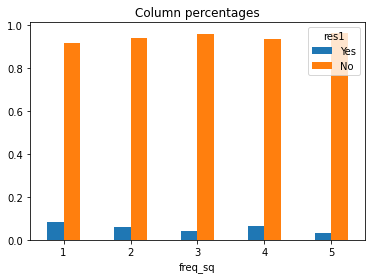

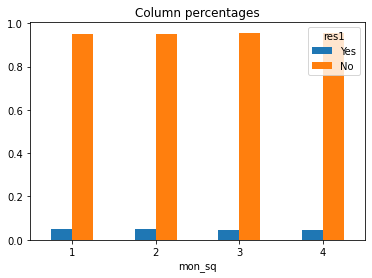

id                     int32
zip                   object
zip_bins            category
sex                 category
bizflag                int32
numords                int32
dollars              float64
last                   int32
sincepurch             int32
version1               int32
owntaxprod             int32
upgraded               int32
res1                category
training               int32
res1_yes               int64
rec_iq              category
freq_iq             category
mon_iq              category
freq_sq             category
mon_sq              category
zip801                 int64
zip804                 int64
avg_dollar           float64
numords_version1       int32
last_version1          int32
dtype: object
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


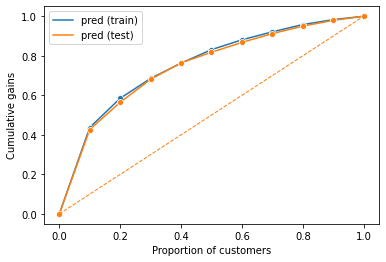

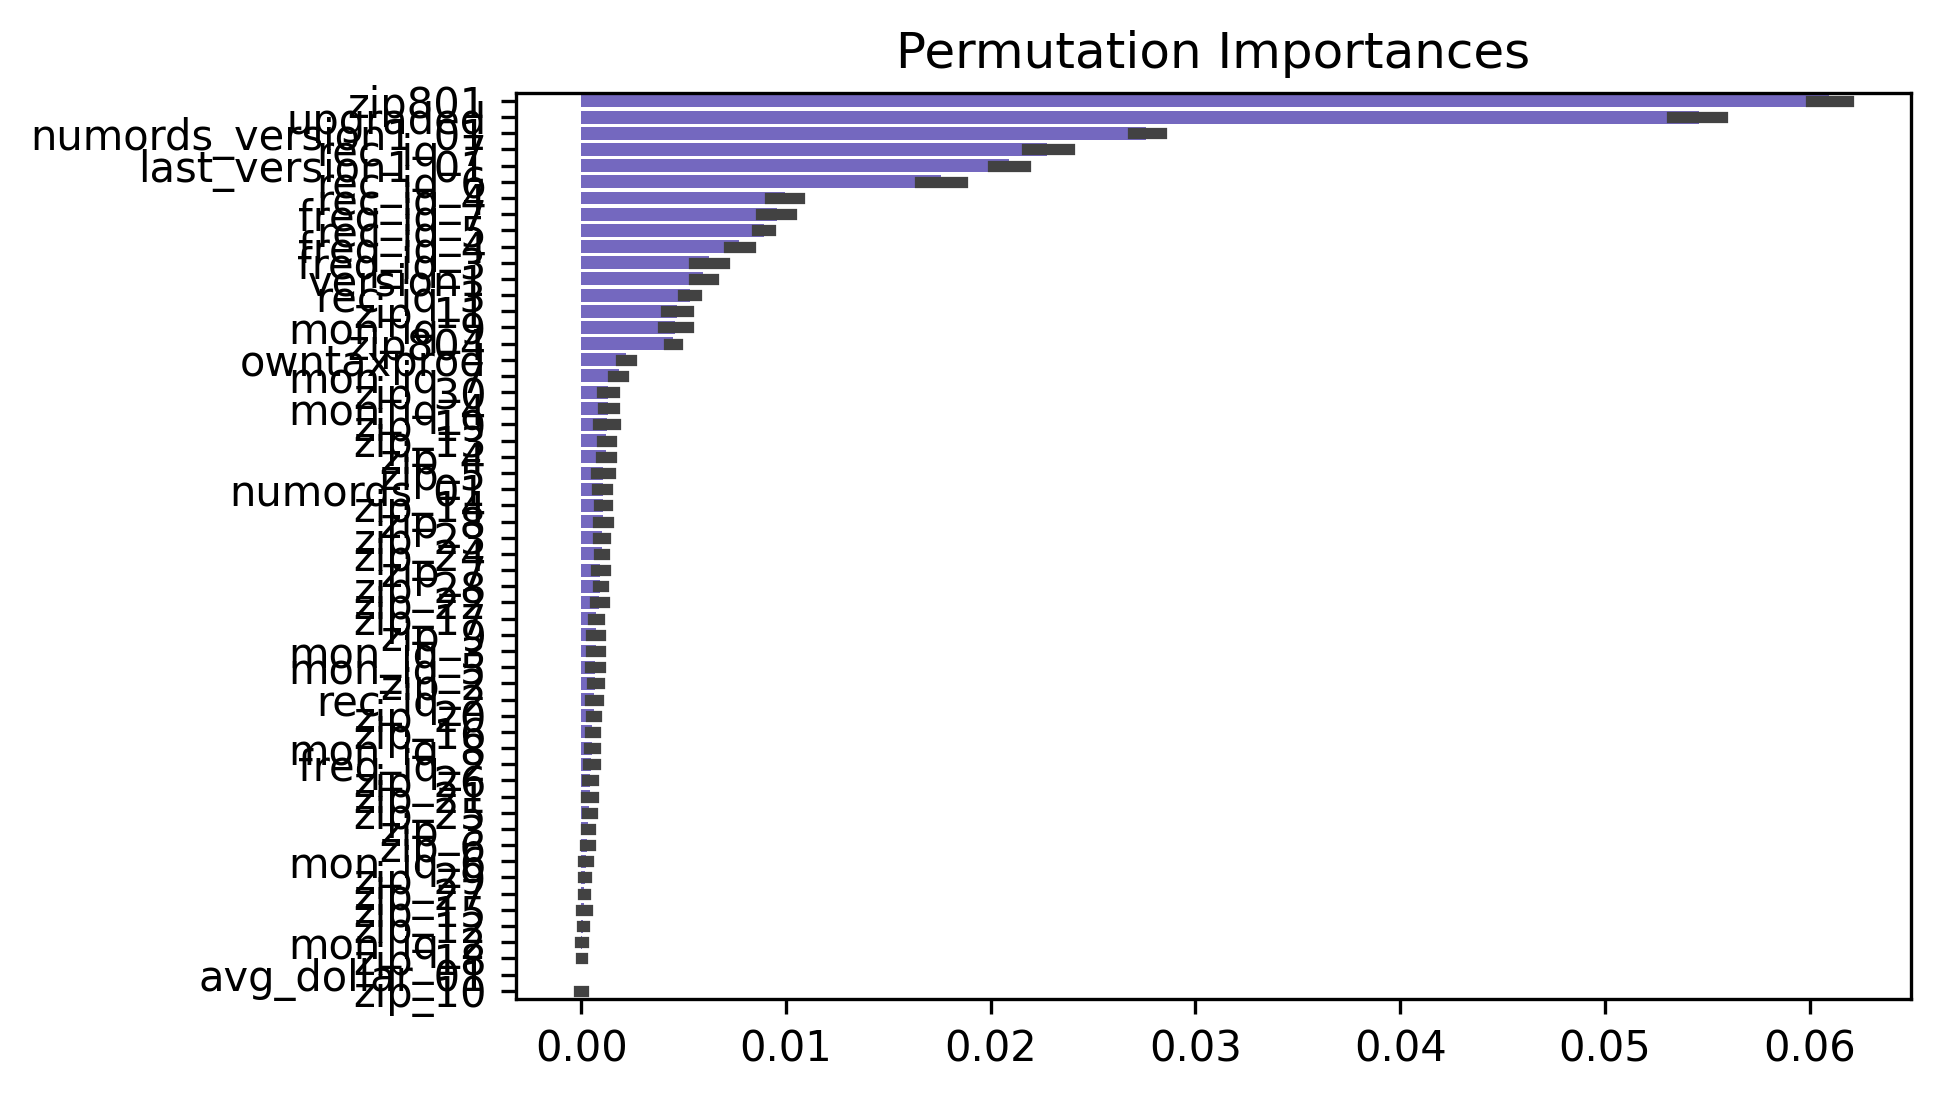

AUC is: 0.767158515328934
Recall Score is: 0.8549410698096102
Precision Score is 0.07334525939177101
Profit is: 38451.630000000005


## Intuit: Quickbooks upgrade

The purpose of this exercise is to gain experience modeling the response to an upsell campaign. The `intuit75k.rds` file contains data on 75,000 (small) businesses that were selected randomly from the 801,821 that were sent the wave-1 mailing. The mailing contained an offer to upgrade to the latest version of the Quickbooks software. 

Variable `res1` denotes which of these businesses responded to the mailing by purchasing Quickbooks version 3.0 from Intuit Direct. Note that Intuit Direct sells products directly to its customers rather than through a retailer. Use the available data to predict which businesses that did not respond to the wave-1 mailing, are most likely to respond to the wave-2 mailing. Note that variables were added, deleted, and recoded so please ignore the variable descriptions in Exhibit 3 in the case in the course reader. Instead, use the variable descriptions below:

## Variable description

* id: Small business customer ID
* zip: 5-Digit ZIP Code (00000=unknown, 99999=international ZIPs).
* zip_bins: Zip-code bins (20 approx. equal sized bins from lowest to highest zip code number)
* sex: "Female", "Male", or "Unknown"
* bizflag: Business Flag.  Address contains a Business name (1 = yes, 0 = no or unknown).
* numords: Number of orders from Intuit Direct in the previous 36 months
* dollars: Total $ ordered from Intuit Direct in the previous 36 months
* last: Time (in months) since last order from Intuit Direct in previous 36 months
* sincepurch: Time (in months) since original (not upgrade) purchase of Quickbooks
* version1: Is 1 if customer's current Quickbooks is version 1, 0 if version 2
* owntaxprod: Is 1 if customer purchased tax software, 0 otherwise
* upgraded: Is 1 if customer upgraded from Quickbooks vs. 1 to vs. 2
* res1: Response to wave 1 mailing ("Yes" if responded else "No")
* training: 70/30 split, 1 for training sample, 0 for validation sample


      index     OR     OR%   2.5%  97.5% p.values     
1   numords  1.352   35.2%  1.313  1.392   < .001  ***
2  version1  2.113  111.3%  1.911  2.335   < .001  ***
3  upgraded  2.628  162.8%  2.388  2.894   < .001  ***

You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates


Cross-tabs
Variables: res1, rec_iq
Null hyp: there is no association between res1 and rec_iq
Alt. hyp: there is an association between res1 and rec_iq

Column percentages:

rec_iq       1       2       3       4       5   Total
res1                                                  
Yes      8.04%   5.36%   4.03%   3.35%   2.41%   4.76%
No      91.96%  94.64%  95.97

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


            variable     vif    Rsq
0       freq_iq[T.5]     inf  1.000
1       freq_sq[T.5]     inf  1.000
2            numords  50.422  0.980
3       freq_iq[T.3]  42.194  0.976
4       freq_sq[T.3]  24.505  0.959
5        mon_iq[T.5]  15.280  0.935
6       freq_sq[T.4]  11.743  0.915
7       freq_iq[T.2]  10.501  0.905
8        mon_iq[T.4]   8.124  0.877
9       freq_sq[T.2]   7.542  0.867
10          version1   7.358  0.864
11       mon_sq[T.4]   6.862  0.854
12       mon_iq[T.3]   5.139  0.805
13    zip_bins[T.10]   4.717  0.788
14    zip_bins[T.12]   4.695  0.787
15    zip_bins[T.24]   4.691  0.787
16        avg_dollar   4.680  0.786
17     zip_bins[T.9]   4.672  0.786
18    zip_bins[T.26]   4.665  0.786
19    zip_bins[T.19]   4.665  0.786
20     zip_bins[T.2]   4.659  0.785
21    zip_bins[T.29]   4.655  0.785
22    zip_bins[T.15]   4.651  0.785
23     zip_bins[T.7]   4.649  0.785
24    zip_bins[T.16]   4.632  0.784
25    zip_bins[T.27]   4.631  0.784
26    zip_bins[T.11]   4.631

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


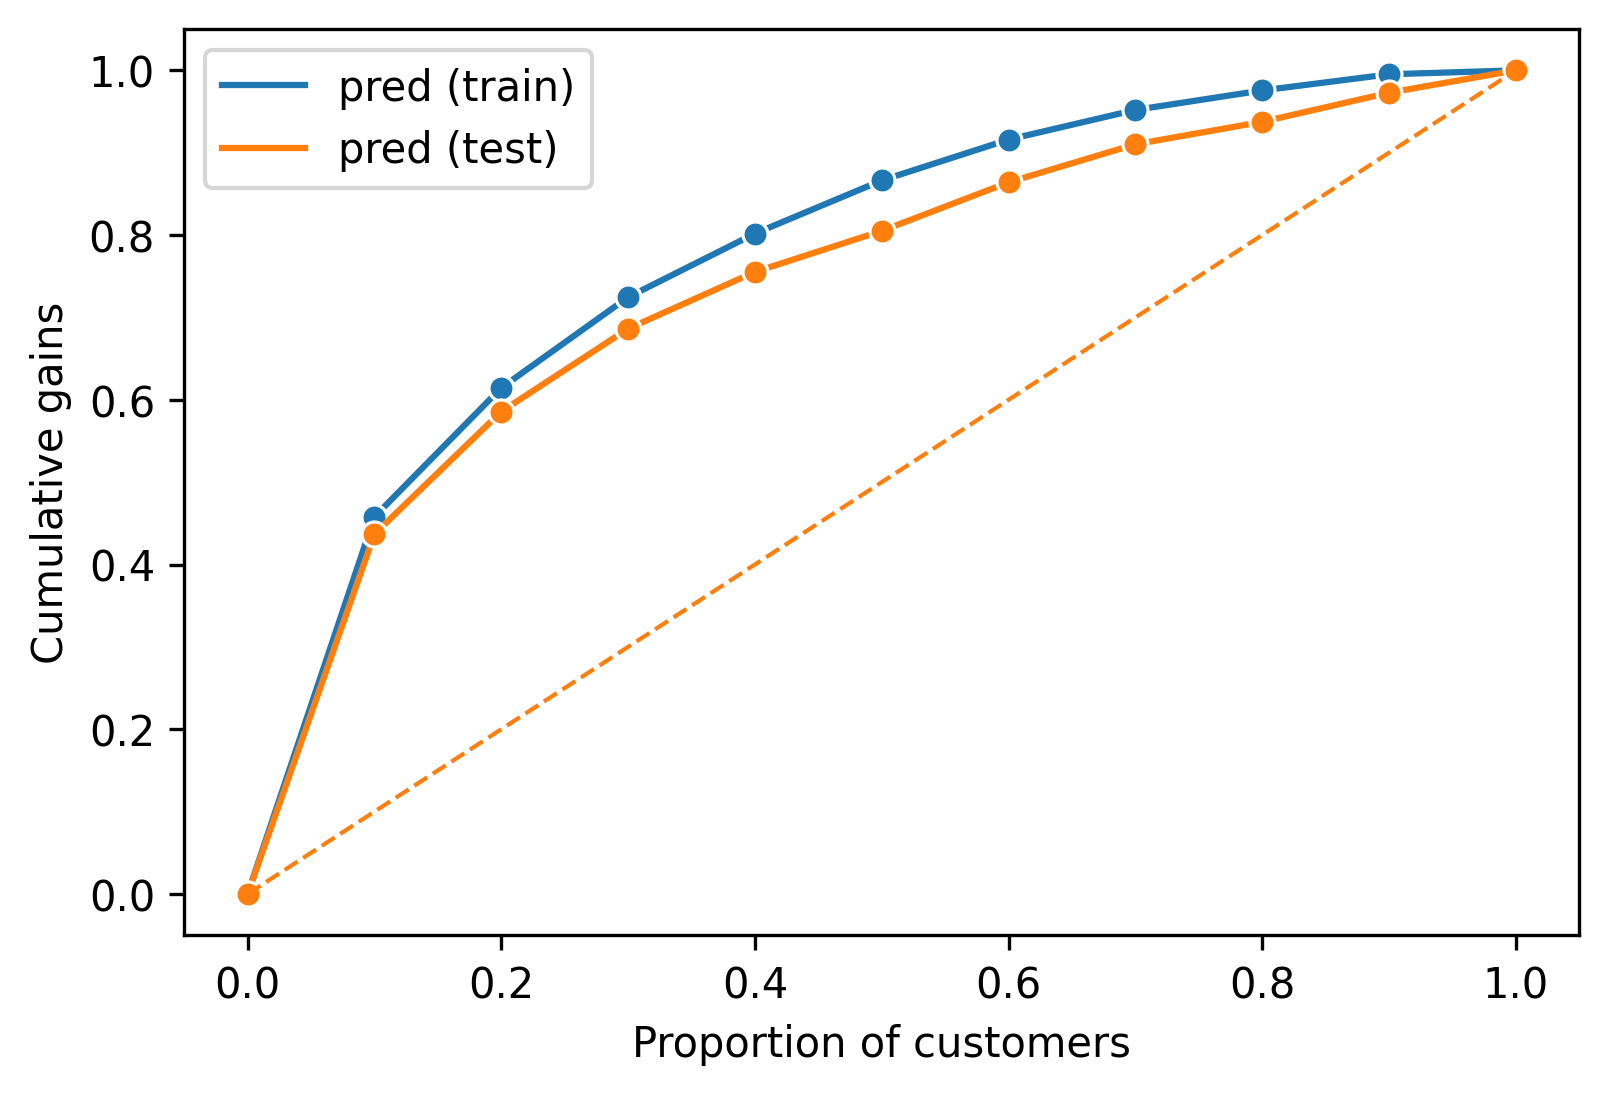

AUC is: 0.7674458773611555
Recall Score is: 0.9265639165911151
Precision Score is 0.06064921963088244
Profit is: 37560.09


## Intuit: Quickbooks upgrade

The purpose of this exercise is to gain experience modeling the response to an upsell campaign. The `intuit75k.rds` file contains data on 75,000 (small) businesses that were selected randomly from the 801,821 that were sent the wave-1 mailing. The mailing contained an offer to upgrade to the latest version of the Quickbooks software. 

Variable `res1` denotes which of these businesses responded to the mailing by purchasing Quickbooks version 3.0 from Intuit Direct. Note that Intuit Direct sells products directly to its customers rather than through a retailer. Use the available data to predict which businesses that did not respond to the wave-1 mailing, are most likely to respond to the wave-2 mailing. Note that variables were added, deleted, and recoded so please ignore the variable descriptions in Exhibit 3 in the case in the course reader. Instead, use the variable descriptions below:

## Variable description

* id: Small business customer ID
* zip: 5-Digit ZIP Code (00000=unknown, 99999=international ZIPs).
* zip_bins: Zip-code bins (20 approx. equal sized bins from lowest to highest zip code number)
* sex: "Female", "Male", or "Unknown"
* bizflag: Business Flag.  Address contains a Business name (1 = yes, 0 = no or unknown).
* numords: Number of orders from Intuit Direct in the previous 36 months
* dollars: Total $ ordered from Intuit Direct in the previous 36 months
* last: Time (in months) since last order from Intuit Direct in previous 36 months
* sincepurch: Time (in months) since original (not upgrade) purchase of Quickbooks
* version1: Is 1 if customer's current Quickbooks is version 1, 0 if version 2
* owntaxprod: Is 1 if customer purchased tax software, 0 otherwise
* upgraded: Is 1 if customer upgraded from Quickbooks vs. 1 to vs. 2
* res1: Response to wave 1 mailing ("Yes" if responded else "No")
* training: 70/30 split, 1 for training sample, 0 for validation sample


      index     OR     OR%   2.5%  97.5% p.values     
1   numords  1.352   35.2%  1.313  1.392   < .001  ***
2  version1  2.113  111.3%  1.911  2.335   < .001  ***
3  upgraded  2.628  162.8%  2.388  2.894   < .001  ***

You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates


Cross-tabs
Variables: res1, rec_iq
Null hyp: there is no association between res1 and rec_iq
Alt. hyp: there is an association between res1 and rec_iq

Column percentages:

rec_iq       1       2       3       4       5       6       7   Total
res1                                                                  
Yes      8.35%   6.64%   4.96%   4.02%   3.71%    2.

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


            variable     vif    Rsq
0       freq_iq[T.3]     inf  1.000
1            numords     inf  1.000
2       freq_iq[T.4]     inf  1.000
3       freq_iq[T.7]     inf  1.000
4       freq_iq[T.2]     inf  1.000
5       freq_sq[T.5]     inf  1.000
6        mon_iq[T.9]  32.785  0.969
7       freq_sq[T.3]  20.245  0.951
8        mon_iq[T.8]  16.558  0.940
9        mon_iq[T.7]  14.938  0.933
10      freq_sq[T.4]  13.070  0.923
11       mon_sq[T.4]  11.794  0.915
12       mon_iq[T.6]  11.318  0.912
13       mon_iq[T.5]   8.805  0.886
14          version1   7.379  0.864
15      freq_sq[T.2]   7.102  0.859
16        avg_dollar   6.401  0.844
17       mon_iq[T.4]   6.198  0.839
18       mon_sq[T.3]   5.217  0.808
19    zip_bins[T.10]   4.718  0.788
20    zip_bins[T.12]   4.696  0.787
21    zip_bins[T.24]   4.692  0.787
22     zip_bins[T.9]   4.672  0.786
23    zip_bins[T.19]   4.666  0.786
24    zip_bins[T.26]   4.666  0.786
25     zip_bins[T.2]   4.660  0.785
26    zip_bins[T.29]   4.657

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


AUC is: 0.7691595202909924
Recall Score is: 0.8757932910244787
Precision Score is 0.07083669428759991
Profit is: 38731.83


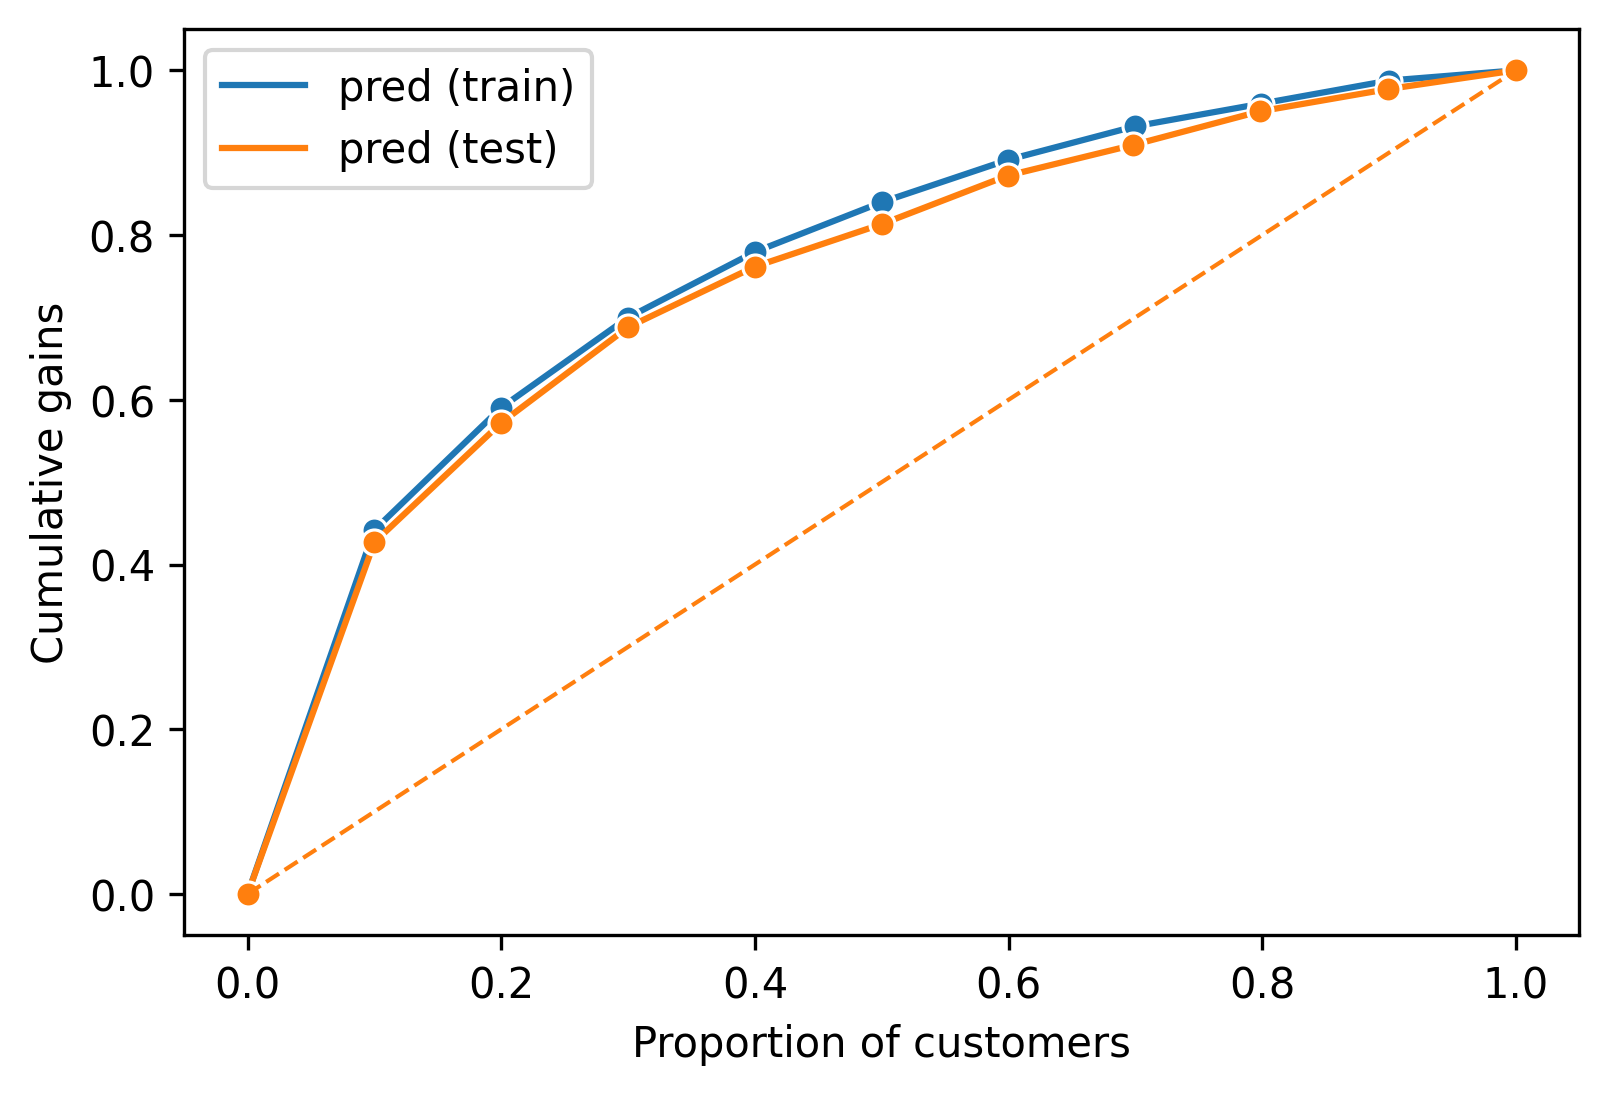

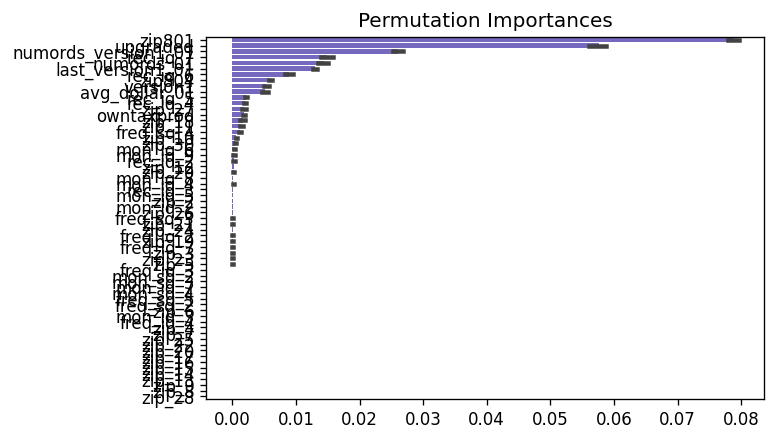

In [4]:
# run python code from another notebook
%run ./sub-notebooks/455_intuit_redux_nn_final.ipynb
%run ./sub-notebooks/intuit-redux_Kai.ipynb
%run ./sub-notebooks/intuit-redux_Songqiao.ipynb

In [5]:
# importing functions from a module/package
from utils import functions
functions.example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



In [6]:
#Make assumptions
cost = 1.41
margin = 60
breakeven =  cost/margin

## Step 1 Create new features

### 1. Xtiles

In [7]:
# Based on previous assignment, we found 9,9,7 is the best combinition
# Notice: Could change tiles if you find your model is underfitting/overfitting

# RFM iq

##Important! Pls copy intuit75k to train_test_yourModelName
train_test_xgboost = intuit75k.copy()

train_test_xgboost = train_test_xgboost.assign(rec_iq=rsm.xtile(train_test_xgboost["last"], 7),
                       freq_iq=rsm.xtile(train_test_xgboost["numords"], 7, rev=True),
                       mon_iq=rsm.xtile(train_test_xgboost["dollars"], 9, rev=True)
                            )
# RFM sq (could change if you want)
train_test_xgboost["freq_sq"] = train_test_xgboost.groupby("rec_iq").numords.transform(rsm.xtile, 5, rev=True)
train_test_xgboost["mon_sq"] = train_test_xgboost.groupby(["rec_iq", "freq_sq"]).dollars.transform(rsm.xtile, 4, rev=True)

ct = rsm.cross_tabs(train_test_xgboost.query("training == 1"), "res1", "rec_iq")
print(ct.summary(output = "perc_col"))

ct = rsm.cross_tabs(train_test_xgboost.query("training == 1"), "res1", "freq_iq")
print(ct.summary(output = "perc_col"))

ct = rsm.cross_tabs(train_test_xgboost.query("training == 1"), "res1", "mon_iq")
print(ct.summary(output = "perc_col"))

ct = rsm.cross_tabs(train_test_xgboost.query("training == 1"), "res1", "freq_sq")
print(ct.summary(output = "perc_col"))

ct = rsm.cross_tabs(train_test_xgboost.query("training == 1"), "res1", "mon_sq")
print(ct.summary(output = "perc_col"))


Cross-tabs
Variables: res1, rec_iq
Null hyp: there is no association between res1 and rec_iq
Alt. hyp: there is an association between res1 and rec_iq

Column percentages:

rec_iq       1       2       3       4       5       6       7   Total
res1                                                                  
Yes      8.35%   6.64%   4.96%   4.02%   3.71%    2.9%   2.34%   4.76%
No      91.65%  93.36%  95.04%  95.98%  96.29%   97.1%  97.66%  95.24%
Total   100.0%  100.0%  100.0%  100.0%  100.0%  100.0%  100.0%  100.0%

Chi-squared: 460.63 df(6), p.value < .001
0.0% of cells have expected values below 5

None

Cross-tabs
Variables: res1, freq_iq
Null hyp: there is no association between res1 and freq_iq
Alt. hyp: there is an association between res1 and freq_iq

Column percentages:

freq_iq       1       2       3       4       7   Total
res1                                                   
Yes      10.68%   8.11%   4.86%   4.36%   3.42%   4.76%
No       89.32%  91.89%  95.14%  9

### 2. zip bins

In [8]:
# Could change based on your model performance: if underfitting: decrease bins; elif overfitting: add more bins
train_test_xgboost = train_test_xgboost.assign(
    zip801 = (train_test_xgboost.zip == "00801").astype(int),
    zip804 =(train_test_xgboost.zip == "00804").astype(int)
)  #Do not change this part

train_test_xgboost = train_test_xgboost.assign(
                       zip_bins = rsm.xtile(train_test_xgboost["zip"].astype(float), 30)
                            )

ct = rsm.cross_tabs(train_test_xgboost.query("training == 1"), "res1", "zip_bins")
print(ct.summary(output = "perc_col"))


Cross-tabs
Variables: res1, zip_bins
Null hyp: there is no association between res1 and zip_bins
Alt. hyp: there is an association between res1 and zip_bins

Column percentages:

zip_bins       1       2       3       4       5       6       7       8  \
res1                                                                       
Yes       30.64%   4.07%    4.2%   3.49%   3.39%   4.26%   3.29%   3.68%   
No        69.36%  95.93%   95.8%  96.51%  96.61%  95.74%  96.71%  96.32%   
Total     100.0%  100.0%  100.0%  100.0%  100.0%  100.0%  100.0%  100.0%   

zip_bins       9      10  ...      22      23      24      25      26      27  \
res1                      ...                                                   
Yes        3.72%   4.34%  ...   3.64%    3.5%   3.76%   4.12%   4.29%   5.25%   
No        96.28%  95.66%  ...  96.36%   96.5%  96.24%  95.88%  95.71%  94.75%   
Total     100.0%  100.0%  ...  100.0%  100.0%  100.0%  100.0%  100.0%  100.0%   

zip_bins      28      29      30 

### 3. add new variables and interactions

In [9]:
# New varaible
train_test_xgboost["avg_dollar"] = train_test_xgboost["dollars"] / train_test_xgboost["numords"]

# Interactions
train_test_xgboost["numords_version1"] = train_test_xgboost["numords"] * train_test_xgboost["version1"]
train_test_xgboost["last_version1"] = train_test_xgboost["last"] * train_test_xgboost["version1"]

In [10]:
train_test_xgboost = train_test_xgboost.astype({'zip_bins': 'category', "rec_iq":"category", "freq_iq":"category",
                         "mon_iq":"category", "freq_sq":"category", "mon_sq":"category"})
print(train_test_xgboost.dtypes)

id                     int32
zip                   object
zip_bins            category
sex                 category
bizflag                int32
numords                int32
dollars              float64
last                   int32
sincepurch             int32
version1               int32
owntaxprod             int32
upgraded               int32
res1                category
training               int32
res1_yes               int64
rec_iq              category
freq_iq             category
mon_iq              category
freq_sq             category
mon_sq              category
zip801                 int64
zip804                 int64
avg_dollar           float64
numords_version1       int32
last_version1          int32
dtype: object


### Check p-values and select features

In [11]:
lr = smf.glm(formula = "res1_yes ~ zip_bins + numords + version1 + owntaxprod + upgraded + rec_iq + freq_iq + mon_iq + freq_sq + mon_sq +\
zip801 + zip804 + avg_dollar + numords_version1 + last_version1",
                family=Binomial(link=logit()),
                data= train_test_xgboost[train_test_xgboost["training"] == 1]
                ).fit()

pd.set_option('display.max_rows', 100)
print(rsm.or_ci(lr))
print(rsm.model_fit(lr))
print(rsm.vif(lr))

               index      OR      OR%    2.5%   97.5% p.values     
1      zip_bins[T.2]   1.522    52.2%   0.813   2.850     0.19     
2      zip_bins[T.3]   1.678    67.8%   0.897   3.140    0.105     
3      zip_bins[T.4]   1.377    37.7%   0.729   2.601    0.324     
4      zip_bins[T.5]   1.269    26.9%   0.671   2.399    0.464     
5      zip_bins[T.6]   1.608    60.8%   0.860   3.008    0.137     
6      zip_bins[T.7]   1.278    27.8%   0.675   2.418    0.451     
7      zip_bins[T.8]   1.388    38.8%   0.737   2.613     0.31     
8      zip_bins[T.9]   1.375    37.5%   0.731   2.586    0.323     
9     zip_bins[T.10]   1.709    70.9%   0.916   3.191    0.092    .
10    zip_bins[T.11]   0.785   -21.5%   0.404   1.526    0.476     
11    zip_bins[T.12]   1.696    69.6%   0.909   3.164    0.097    .
12    zip_bins[T.13]   1.289    28.9%   0.682   2.434    0.434     
13    zip_bins[T.14]   1.277    27.7%   0.676   2.415    0.451     
14    zip_bins[T.15]   1.512    51.2%   0.806   

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


            variable     vif    Rsq
0       freq_iq[T.3]     inf  1.000
1            numords     inf  1.000
2       freq_iq[T.4]     inf  1.000
3       freq_iq[T.7]     inf  1.000
4       freq_iq[T.2]     inf  1.000
5       freq_sq[T.5]     inf  1.000
6        mon_iq[T.9]  32.785  0.969
7       freq_sq[T.3]  20.245  0.951
8        mon_iq[T.8]  16.558  0.940
9        mon_iq[T.7]  14.938  0.933
10      freq_sq[T.4]  13.070  0.923
11       mon_sq[T.4]  11.794  0.915
12       mon_iq[T.6]  11.318  0.912
13       mon_iq[T.5]   8.805  0.886
14          version1   7.379  0.864
15      freq_sq[T.2]   7.102  0.859
16        avg_dollar   6.401  0.844
17       mon_iq[T.4]   6.198  0.839
18       mon_sq[T.3]   5.217  0.808
19    zip_bins[T.10]   4.718  0.788
20    zip_bins[T.12]   4.696  0.787
21    zip_bins[T.24]   4.692  0.787
22     zip_bins[T.9]   4.672  0.786
23    zip_bins[T.19]   4.666  0.786
24    zip_bins[T.26]   4.666  0.786
25     zip_bins[T.2]   4.660  0.785
26    zip_bins[T.29]   4.657

In [12]:
pd.set_option("display.min_rows", 10)
train_test_xgboost.loc[:,"zip_bins":].corr()

,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,training,res1_yes,zip801,zip804,avg_dollar,numords_version1,last_version1
bizflag,1.000000,0.000197,0.002038,-0.000390,-0.005220,-0.006011,0.004565,-0.003080,-0.003159,0.000793,0.007191,-0.004104,0.000079,-0.006450,-0.006147
numords,0.000197,1.000000,0.585654,-0.130356,0.001763,0.005728,0.119726,-0.002755,-0.006790,0.093512,-0.007592,-0.001768,-0.100501,0.262427,-0.028828
dollars,0.002038,0.585654,1.000000,-0.074659,0.000815,0.002217,0.074988,-0.001420,-0.007628,0.067876,-0.006172,-0.010586,0.624403,0.152017,-0.018324
last,-0.000390,-0.130356,-0.074659,1.000000,-0.001169,0.002018,-0.019854,-0.000192,0.002887,-0.089597,-0.001303,0.001575,0.035161,-0.031669,0.263436
sincepurch,-0.005220,0.001763,0.000815,-0.001169,1.000000,0.524144,-0.001149,0.511277,-0.006168,0.078900,-0.000299,0.006892,0.001559,0.437232,0.432623
version1,-0.006011,0.005728,0.002217,0.002018,0.524144,1.000000,-0.084814,-0.267716,-0.003192,0.043701,0.002656,0.006664,-0.002163,0.830672,0.826463
owntaxprod,0.004565,0.119726,0.074988,-0.019854,-0.001149,-0.084814,1.000000,0.087418,-0.000593,0.029017,-0.003174,-0.000541,-0.011236,-0.068459,-0.071078
upgraded,-0.003080,-0.002755,-0.001420,-0.000192,0.511277,-0.267716,0.087418,1.000000,-0.004535,0.066733,-0.003025,0.004779,0.003702,-0.222384,-0.221257
training,-0.003159,-0.006790,-0.007628,0.002887,-0.006168,-0.003192,-0.000593,-0.004535,1.000000,-0.003089,0.002841,-0.001872,-0.004775,-0.004853,-0.002959
res1_yes,0.000793,0.093512,0.067876,-0.089597,0.078900,0.043701,0.029017,0.066733,-0.003089,1.000000,0.257099,0.069051,0.001933,0.092322,-0.012482


## Step 2 Feature Engineering

### Drop features

In [13]:
# Drop unnecessary features, 
#but your are free to add them back 
#as long as they could improve model performance
drop_columns = ["id","zip","res1","sex", "bizflag", "dollars", "last","sincepurch"]#
train_test_xgboost.drop(drop_columns, axis = 1, inplace = True)

In [14]:
train_test_xgboost.dtypes

zip_bins            category
numords                int32
version1               int32
owntaxprod             int32
upgraded               int32
training               int32
res1_yes               int64
rec_iq              category
freq_iq             category
mon_iq              category
freq_sq             category
mon_sq              category
zip801                 int64
zip804                 int64
avg_dollar           float64
numords_version1       int32
last_version1          int32
dtype: object

### One-hot coding categorical features

In [15]:
# If you added categorical features before, pls add them in here
# Example of categorical features: Male:0, Female:1. It have no sense 1(Female) > 0(Male)
# zip_bins it no sense that one zip_bins is "greater" than other bins

# Important!!! You DO NOT need to one-hot coding version1, owntaxprod exc.. They are already
# "One-hot coding"
train_test_xgboost = pd.concat(
    [
        train_test_xgboost,
        pd.get_dummies(train_test_xgboost["zip_bins"], prefix='zip', drop_first = True),
        pd.get_dummies(train_test_xgboost["rec_iq"], prefix='rec_iq', drop_first = True),
        pd.get_dummies(train_test_xgboost["freq_iq"], prefix='freq_iq', drop_first = True),
        pd.get_dummies(train_test_xgboost["mon_iq"], prefix='mon_iq', drop_first = True),
        pd.get_dummies(train_test_xgboost["freq_sq"], prefix='freq_sq', drop_first = True),
        pd.get_dummies(train_test_xgboost["mon_sq"], prefix='mon_sq', drop_first = True)
        ],
    axis = 1   
)

### 0-1 normalization

In [16]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()


# If you added discrete or continuous variables before, pls add here
# Example of discrete features: numorders 1.5 orders make no sense but 2 orders is definitely better than 1 order
# Example of continous features: dollars 100, 100.5, 200.34 dollar are definitely make sense


columns = ["numords", "avg_dollar", "numords_version1", "last_version1"]
columns_01 = ["numords_01", "avg_dollar_01", "numords_version1_01", "last_version1_01"]
x = train_test_xgboost[columns]
features_01 = pd.DataFrame(min_max_scaler.fit_transform(x), columns = columns_01)

train_test_xgboost = pd.concat(
    [
        train_test_xgboost,
        features_01
        ],
    axis = 1 
)

train_test_xgboost.drop(columns, axis = 1, inplace = True)

In [17]:
#remember drop unnecessary here, e.g. features one-hot coded before, normalized before
train_test_xgboost.drop(['zip_bins','rec_iq','freq_iq','mon_iq', 'freq_sq','mon_sq'], axis=1, inplace = True)

In [18]:
train = train_test_xgboost[train_test_xgboost["training"] == 1]
test = train_test_xgboost[train_test_xgboost["training"] == 0]

train.drop(["training"], axis = 1, inplace = True)
test.drop(["training"], axis = 1, inplace = True)

y_train = np.array(train["res1_yes"])
y_test = np.array(test["res1_yes"])

train.drop(["res1_yes"], axis = 1, inplace = True)
test.drop(["res1_yes"], axis = 1, inplace = True)

x_train = np.array(train)
x_test = np.array(test)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

#First, define your model here
xgb = xgb.XGBClassifier()

#Then, set hyperparameters you want to add in grid search
parameters = {'nthread':[4],
              'objective':['binary:logistic'],
              'gamma':[3.55], #0.1,0.3,0.5,0.7,1.0,1.2 #3.55 best
              'eta': [0.1],# 0.02, 0.03, 0.04, 0.05, 0.1, 0.2 #0.1 best
              'max_delta_step':[0],
              'sampling_method':['uniform'],
              'max_depth': [3],#3, 4,6,8,10 #3 best
              'min_child_weight': [0.95],#1, 3, 5, 7,9 #0.95 best
              'subsample': [0.8],
              'colsample_bytree': [0.7],# 0.6,0.7, 0.8, 1 #0.7 best
              'colsample_bylevel':[1],
              'colsample_bynode':[1],
              'n_estimators': [110], 
              'scale_pos_weight': [1],
              'reg_alpha':[0.035],
              'silent': [1],
              'missing':[-999],
              'seed': [1949]}


# Finally, grid search the best hyperparameter combition. It may takes you a long time!
clf = GridSearchCV(xgb, parameters, 
                   n_jobs=5, #n_jobs means number of jobs to run in parallel. 5 will use 5 of your CPU processors
                   cv = StratifiedKFold(5).split(x_train, y_train), #Unbalnaced data, thus StratifiedKFold
                   scoring='roc_auc',
                   verbose=2, refit=True)

#Fit your model here
clf.fit(x_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:09] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:07:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f88cfa3cba0>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, m...
             param_grid={'colsample_bylevel': [1], 'colsample_bynode': [1],
                         'colsample_bytree': [0.7], 'eta': [0.1],
                         'gamma': [3.55], 'max_delta_step': [0],
                         'max_depth': [3], 'min_child_weight': [0.95],
                         'missing': [-99

In [20]:
# Check the best combinition
clf.best_params_

{'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.1,
 'gamma': 3.55,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 0.95,
 'missing': -999,
 'n_estimators': 110,
 'nthread': 4,
 'objective': 'binary:logistic',
 'reg_alpha': 0.035,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'seed': 1949,
 'silent': 1,
 'subsample': 0.8}

/usr/local/lib/python3.8/dist-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


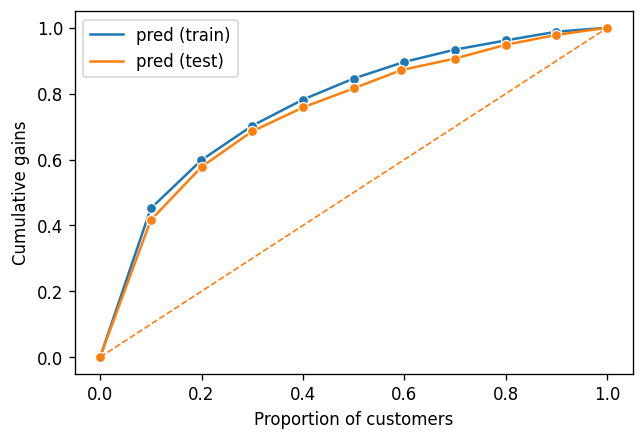

In [21]:
# Check overfitting
pred_train = pd.DataFrame().assign(
    actual = y_train, pred = clf.predict_proba(x_train)[:, 1]
)
pred_test = pd.DataFrame().assign(actual = y_test, pred=clf.predict_proba(x_test)[:, 1])

dct = {"train": pred_train, "test": pred_test}
fig = rsm.gains_plot(dct, "actual", 1, "pred").legend(title=None)

In [22]:
# Check feature importance
import seaborn as sns
def importance(clf, X, y, cn):
    imp = permutation_importance(
        clf, X, y, scoring="roc_auc", n_repeats=10, random_state=1234
    )
    data = pd.DataFrame(imp.importances.T)
    data.columns = cn
    order = data.agg("mean").sort_values(ascending=False).index
    fig = sns.barplot(
        x="value", y="variable", color="slateblue", data=pd.melt(data[order])
    )
    fig.set(title="Permutation Importances", xlabel=None, ylabel=None)
    return fig


mpl.rcParams["figure.dpi"] = 300
#fig = importance(clf, x_train, y_train, train.columns)

In [23]:
pred_proba = clf.predict_proba(x_test)[:,1]

#change the variable name: pred_result_yourModelName
pred_result_xgboost = pd.DataFrame({"id":intuit75k[intuit75k["training"] == 0]['id'],
              "res1_yes":intuit75k[intuit75k["training"] == 0]['res1_yes'],
             "pred_proba":pred_proba})

pred_result_xgboost["pred_yes"] = pred_result_xgboost["pred_proba"].apply(lambda x: 1 if x > breakeven else 0)

pred_result_xgboost

/usr/local/lib/python3.8/dist-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,id,res1_yes,pred_proba,pred_yes
1,2,0,0.026976,1
2,3,0,0.069889,1
4,5,0,0.022433,0
6,7,0,0.022093,0
8,9,0,0.018676,0
...,...,...,...,...
74981,74982,0,0.023962,1
74982,74983,0,0.017107,0
74987,74988,0,0.139094,1
74993,74994,1,0.132316,1


In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("AUC is:", roc_auc_score(y_test, pred_result_xgboost["pred_proba"]))
print("Recall Score is:", recall_score(y_test, pred_result_xgboost["pred_yes"]))
print("Precision Score is", precision_score(y_test, pred_result_xgboost["pred_yes"]))

#For the purposes of this exercise assume each mail piece costs $1.41 and that the margin (or net revenue) from each responder, excluding the mailing cost, is $60.
profit = margin * pred_result_xgboost[(pred_result_xgboost["pred_yes"] == 1) & (pred_result_xgboost["res1_yes"] == 1)].shape[0] - cost * pred_result_xgboost[(pred_result_xgboost["pred_yes"] == 1)].shape[0]
print("Profit is:", profit)

AUC is: 0.7686158543760064
Recall Score is: 0.8830462375339981
Precision Score is 0.07046737085805238
Profit is: 38950.979999999996


In [25]:
import lightgbm as lgb

lgb = lgb.LGBMClassifier()

parameters = {'num_threads':[4],
              'seed':[1949],
              'boosting_type':['gbdt'],
              'objective':['binary'],
              'learning_rate':[0.1],
              'n_estimators':[105],
              'max_depth': [3], #3 best
              'min_child_weight':[0.85], #0.85 best
              'num_leaves': [4],
              'subsample':[0.8],
              'colsample_bytree':[0.7],
              'colsample_bynode':[0.75],
              'scale_pos_weight':[0.95],
              'min_child_samples':[30],
              'min_sum_hessian_in_leaf':[0.001],
              'reg_alpha':[0.01],
              'drop_rate':[0.05],
              'min_gain_to_split':[0.5]
             }

clf = GridSearchCV(lgb, parameters, 
                   n_jobs=5, #n_jobs means number of jobs to run in parallel. 5 will use 5 of your CPU processors
                   cv = StratifiedKFold(5).split(x_train, y_train), #Unbalnaced data, thus StratifiedKFold
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_gain_to_split is set=0.5, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.85 will be ignored. Current value: min_sum_hessian_in_leaf=0.001


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f8871759f20>,
             estimator=LGBMClassifier(), n_jobs=5,
             param_grid={'boosting_type': ['gbdt'], 'colsample_bynode': [0.75],
                         'colsample_bytree': [0.7], 'drop_rate': [0.05],
                         'learning_rate': [0.1], 'max_depth': [3],
                         'min_child_samples': [30], 'min_child_weight': [0.85],
                         'min_gain_to_split': [0.5],
                         'min_sum_hessian_in_leaf': [0.001],
                         'n_estimators': [105], 'num_leaves': [4],
                         'num_threads': [4], 'objective': ['binary'],
                         'reg_alpha': [0.01], 'scale_pos_weight': [0.95],
                         'seed': [1949], 'subsample': [0.8]},
             scoring='roc_auc', verbose=2)

In [26]:
clf.best_params_

{'boosting_type': 'gbdt',
 'colsample_bynode': 0.75,
 'colsample_bytree': 0.7,
 'drop_rate': 0.05,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_samples': 30,
 'min_child_weight': 0.85,
 'min_gain_to_split': 0.5,
 'min_sum_hessian_in_leaf': 0.001,
 'n_estimators': 105,
 'num_leaves': 4,
 'num_threads': 4,
 'objective': 'binary',
 'reg_alpha': 0.01,
 'scale_pos_weight': 0.95,
 'seed': 1949,
 'subsample': 0.8}

{'train':        actual      pred
 0           0  0.037254
 1           0  0.017776
 2           0  0.048274
 3           0  0.044751
 4           0  0.027986
 ...       ...       ...
 52495       0  0.019650
 52496       1  0.046825
 52497       0  0.011062
 52498       0  0.048675
 52499       0  0.053191
 
 [52500 rows x 2 columns],
 'test':        actual      pred
 0           0  0.024136
 1           0  0.070386
 2           0  0.021281
 3           0  0.024162
 4           0  0.018434
 ...       ...       ...
 22495       0  0.025072
 22496       0  0.016483
 22497       0  0.135259
 22498       1  0.124716
 22499       0  0.072213
 
 [22500 rows x 2 columns]}

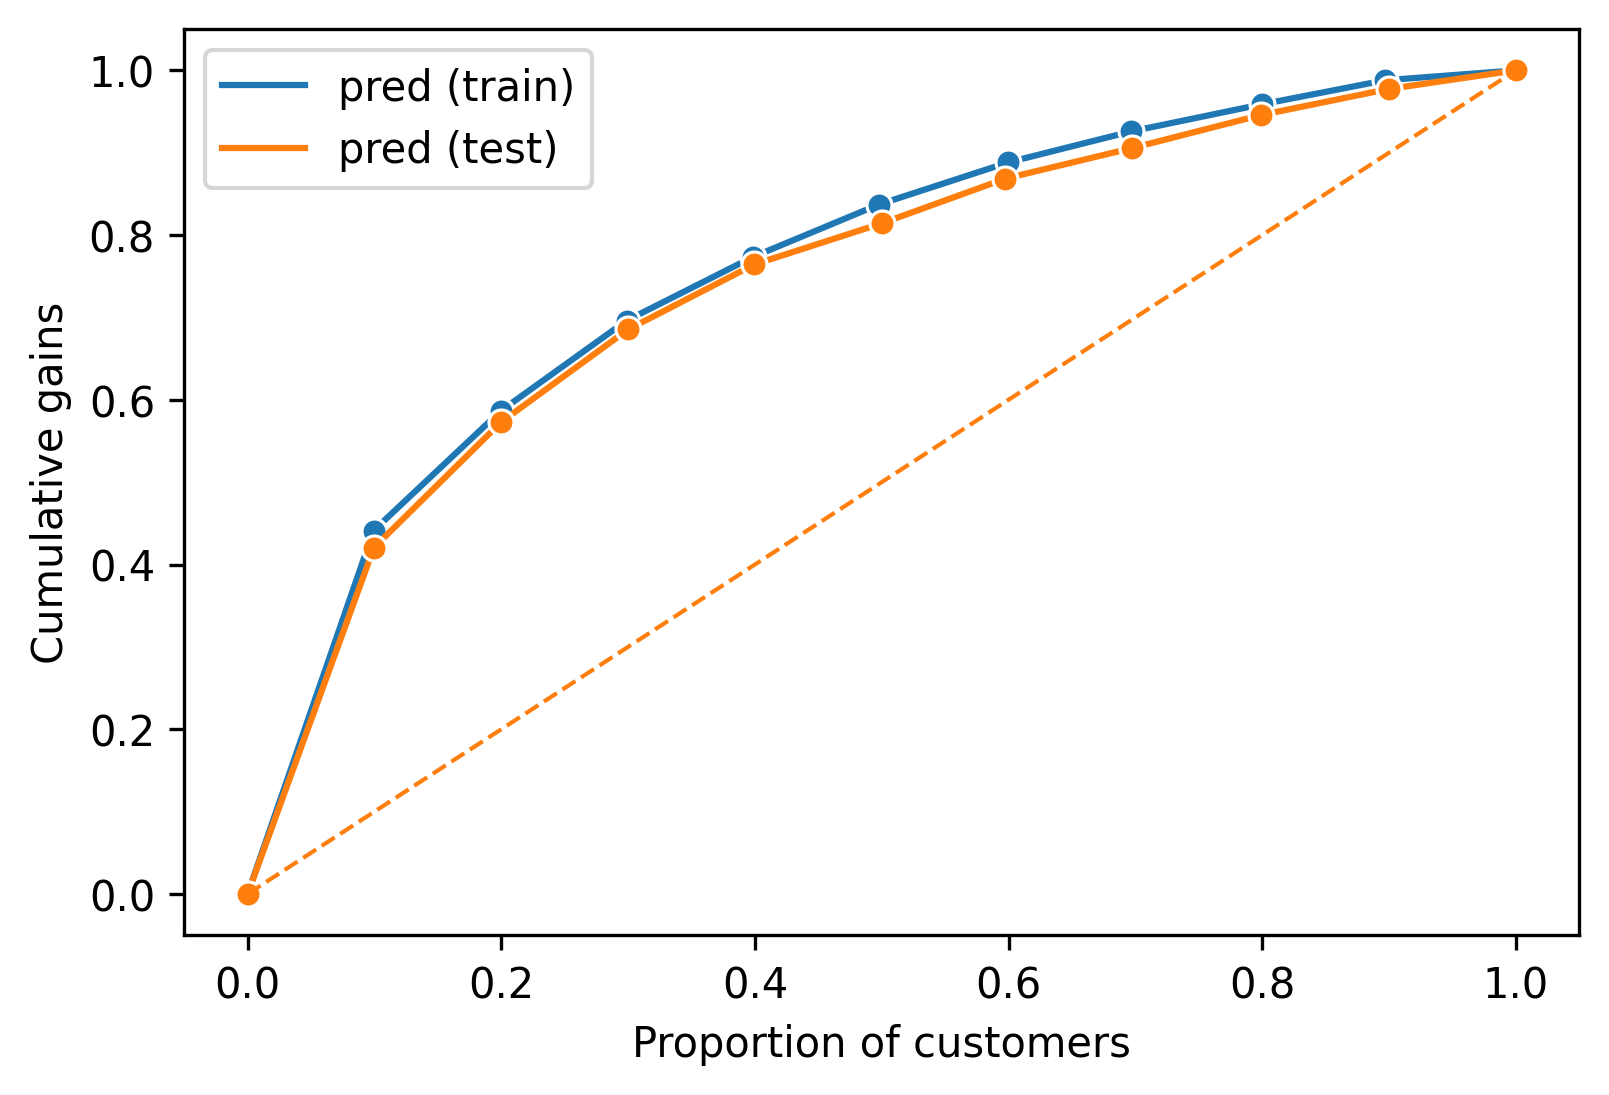

In [27]:
# Check overfitting
pred_train = pd.DataFrame().assign(
    actual = y_train, pred = clf.predict_proba(x_train)[:, 1]
)
pred_test = pd.DataFrame().assign(actual = y_test, pred=clf.predict_proba(x_test)[:, 1])

dct = {"train": pred_train, "test": pred_test}
fig = rsm.gains_plot(dct, "actual", 1, "pred").legend(title=None)
dct

In [28]:
mpl.rcParams["figure.dpi"] = 300
#fig = importance(clf, x_train, y_train, train.columns)

In [29]:
pred_proba = clf.predict_proba(x_test)[:,1]

#change the variable name: pred_result_yourModelName
pred_result_lgb = pd.DataFrame({"id":intuit75k[intuit75k["training"] == 0]['id'],
              "res1_yes":intuit75k[intuit75k["training"] == 0]['res1_yes'],
             "pred_proba":pred_proba})

pred_result_lgb["pred_yes"] = pred_result_lgb["pred_proba"].apply(lambda x: 1 if x > breakeven else 0)

pred_result_lgb

,id,res1_yes,pred_proba,pred_yes
1,2,0,0.024136,1
2,3,0,0.070386,1
4,5,0,0.021281,0
6,7,0,0.024162,1
8,9,0,0.018434,0
...,...,...,...,...
74981,74982,0,0.025072,1
74982,74983,0,0.016483,0
74987,74988,0,0.135259,1
74993,74994,1,0.124716,1


In [30]:
print("AUC is:", roc_auc_score(y_test, pred_result_lgb["pred_proba"]))
print("Recall Score is:", recall_score(y_test, pred_result_lgb["pred_yes"]))
print("Precision Score is", precision_score(y_test, pred_result_lgb["pred_yes"]))

#For the purposes of this exercise assume each mail piece costs $1.41 and that the margin (or net revenue) from each responder, excluding the mailing cost, is $60.
profit = margin * pred_result_lgb[(pred_result_lgb["pred_yes"] == 1) & (pred_result_lgb["res1_yes"] == 1)].shape[0] - cost * pred_result_lgb[(pred_result_lgb["pred_yes"] == 1)].shape[0]
print("Profit is:", profit)

AUC is: 0.7678054188716859
Recall Score is: 0.8685403445149592
Precision Score is 0.07200300638857572
Profit is: 38719.95


In [31]:
result = pd.DataFrame({"id":intuit75k[intuit75k["training"] == 0]['id'],
              "res1_yes":intuit75k[intuit75k["training"] == 0]['res1_yes'],
             "xgb_result":pred_result_xgboost["pred_yes"],
            "lgb_result":pred_result_lgb["pred_yes"],
            "nn_result":pred_result_NN2["pred_yes"], 
            'gb_result':pred_result_gradboost["pred_yes"],
            'rf_result':pred_result_rf["pred_yes"]})

result["voting_result"] = result["xgb_result"] + result["lgb_result"] + result["nn_result"] + result["gb_result"] + result["rf_result"]
result["pred_yes"] = result["voting_result"].apply(lambda x: 1 if x >= 3 else 0)

In [32]:
result

,id,res1_yes,xgb_result,lgb_result,nn_result,gb_result,rf_result,voting_result,pred_yes
1,2,0,1,1,1,1,1,5,1
2,3,0,1,1,1,1,1,5,1
4,5,0,0,0,1,0,0,1,0
6,7,0,0,1,1,1,0,3,1
8,9,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
74981,74982,0,1,1,0,1,1,4,1
74982,74983,0,0,0,0,0,1,1,0
74987,74988,0,1,1,1,1,1,5,1
74993,74994,1,1,1,1,1,1,5,1


In [33]:
profit = margin * result[(result["pred_yes"] == 1) & (result["res1_yes"] == 1)].shape[0] - cost * result[(result["pred_yes"] == 1)].shape[0]
print("Profit is:", profit)

Profit is: 38808.42


In [35]:
result = pd.DataFrame({"id":intuit75k[intuit75k["training"] == 0]['id'],
              "res1_yes":intuit75k[intuit75k["training"] == 0]['res1_yes'],
             "xgb_proba":pred_result_xgboost["pred_proba"],
            "lgb_proba":pred_result_lgb["pred_proba"],
            "nn_proba":pred_result_NN2["pred_proba"], 
            'gb_proba':pred_result_gradboost["pred_proba"],
            'rf_proba':pred_result_rf["pred_proba"]})

result["xgb_result"] = result["xgb_proba"].apply(lambda x: 1 if x / 2 >= breakeven else 0)
result["lgb_result"] = result["lgb_proba"].apply(lambda x: 1 if x / 2 >= breakeven else 0)
result["nn_result"] = result["nn_proba"].apply(lambda x: 1 if x / 2 >= breakeven else 0)
result["gb_result"] = result["gb_proba"].apply(lambda x: 1 if x / 2 >= breakeven else 0)
result["rf_result"] = result["rf_proba"].apply(lambda x: 1 if x / 2 >= breakeven else 0)

result["voting_result"] = result["xgb_result"] + result["lgb_result"] + result["nn_result"] + result["gb_result"] + result["rf_result"]
result["pred_yes"] = result["voting_result"].apply(lambda x: 1 if x >= 3 else 0)
result["mailto_wave2"] = np.where((result.res1_yes == 0) & (result.pred_yes == 1), "TRUE", "FALSE")
print(result)

#result = result[["id","mailto_wave2"]]
#result.to_csv("Kaicheng_Songqiao_Yanqiao_Tiancheng_Just4Noobs.csv",index=False)

          id  res1_yes  xgb_proba  lgb_proba  nn_proba  gb_proba  rf_proba  \
1          2         0   0.026976   0.024136  0.031657  0.025295  0.035408   
2          3         0   0.069889   0.070386  0.078505  0.073356  0.068562   
4          5         0   0.022433   0.021281  0.031068  0.022784  0.022189   
6          7         0   0.022093   0.024162  0.026236  0.023789  0.022443   
8          9         0   0.018676   0.018434  0.018872  0.021056  0.024471   
...      ...       ...        ...        ...       ...       ...       ...   
74981  74982         0   0.023962   0.025072  0.020155  0.025822  0.025524   
74982  74983         0   0.017107   0.016483  0.020154  0.017532  0.026366   
74987  74988         0   0.139094   0.135259  0.142172  0.132585  0.155805   
74993  74994         1   0.132316   0.124716  0.156300  0.151132  0.103831   
74999  75000         0   0.074460   0.072213  0.082542  0.086736  0.064446   

       xgb_result  lgb_result  nn_result  gb_result  rf_result 